/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_34857/1682637407.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_34857/1682637407.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_34857/1682637407.py:101: UserWarning: color is redundantly defi

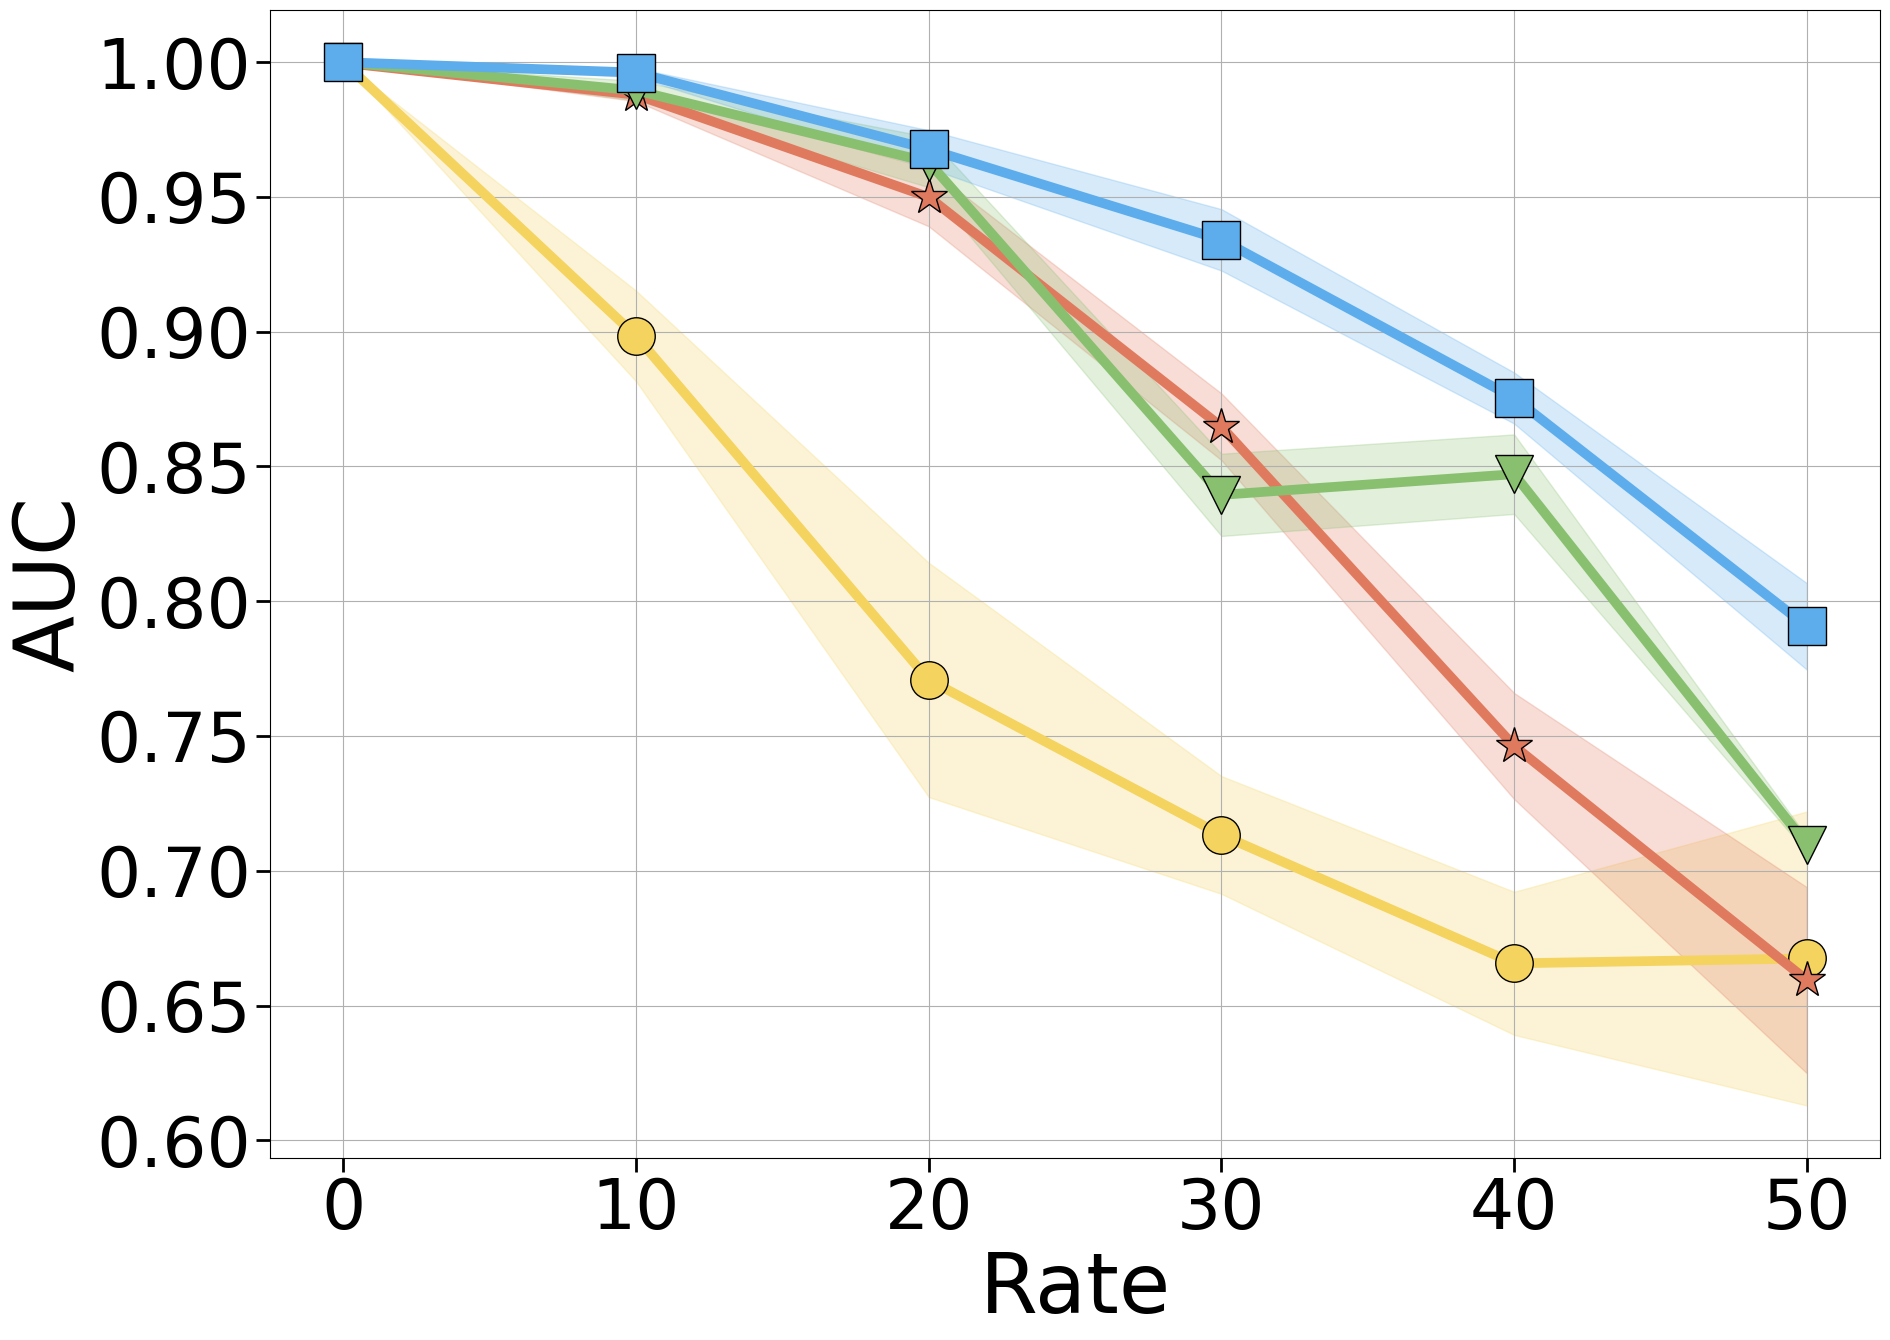

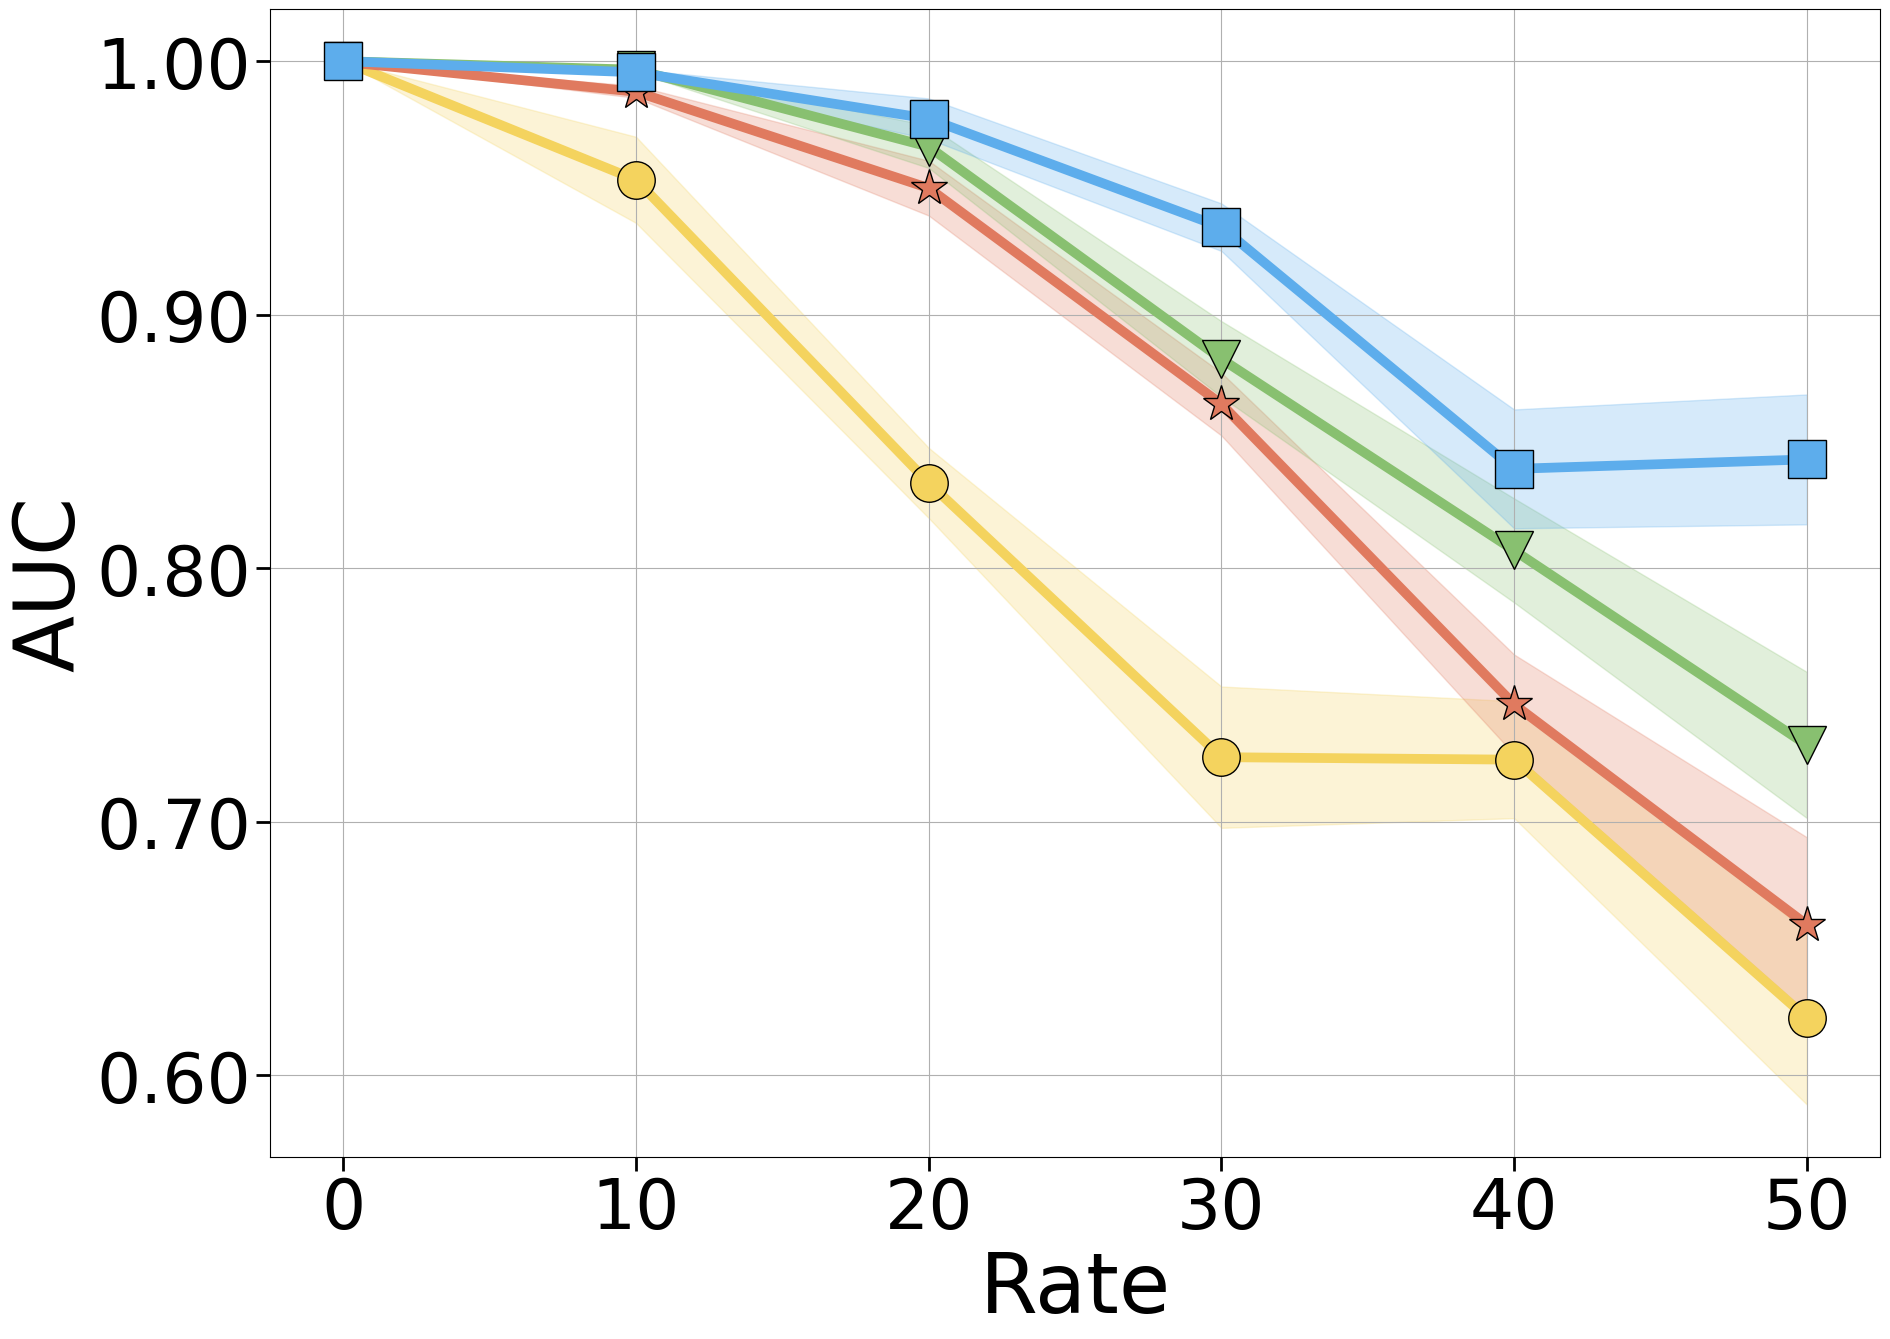

In [14]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score
from matplotlib.ticker import FuncFormatter



# for MODE in ['MAR','MNAR','MCAR']:
for MODE in ['MAR','MNAR']:
# for MODE in ['MNAR']:
    # for task in ['iTunes-Amazon','Fodors-Zagats','Walmart-Amazon']:
    for task in ['Fodors-Zagats']:
    # for task in ['Walmart-Amazon']:
        


        plt.figure(figsize=(19, 13.5))
        plt.xlabel('Rate', fontsize=60)
        plt.ylabel('AUC', fontsize=60)
        plt.yticks(fontsize=50)
        plt.xticks([0,0.1, .2, .3, .40, .50, ], [0,10, 20, 30, 40, 50], fontsize=50)

        # List of model names
        model_names_base = [ 'DeepMatcher','DITTO','HierGAT','EMTransformer']
        # model_names_base = [ 'DeepMatcher']
        model_names = [] 
        for row in model_names_base:
            model_names.append(row + task)

        name_to_abbreviation = {
            # 'Hiermatcher': 'HM',
            'DeepMatcher': 'DM',
            'DITTO': 'DITTO',
            'EMTransformer': 'EM',
            'HierGAT': 'HG'
        }

        # Dictionary for colors and markers
        style_dict = {
            'DeepMatcher': {'color': '#F4D35E', 'marker': 'o'},
            'DITTO': {'color': '#E07A5F', 'marker': '*'},
            'EMTransformer': {'color': '#5DADEC', 'marker': 's'},
            'HierGAT': {'color': '#88C070', 'marker': 'v'}
        }


        frac_values = ['00','10', '20', '30', '40', '50']
        
        for name in model_names:
            AUC = []

            for frac in frac_values:
                auc_list = []
                if frac == '00':
                    R = range(1,2)
                else:
                    if 'walmart' in task:
                        R= range(1,16)
                    else:
                        R = range(1,11)
                    R = range(1,6)


                for rep in R:
                    tmp = name_to_abbreviation.get(name.replace(task,''), name.replace(task,''))
                    name2 = name + '_'+MODE
                    name2 = name2.replace(task,'_'+task)
                    file_path = f'out_miss/{name2}/DM_score_'+task+f'_{frac}_{rep}.csv'
                    df = pd.read_csv(file_path)
                    
                    # try:
                    #     df = pd.read_csv(file_path)
                    # except FileNotFoundError:
                    #     continue
                    
                    y_true, y_score = df.iloc[:, 1], df.iloc[:, 0]
                    if 'HierGAT' in name:
                        y_true, y_score = df.iloc[:, 0], df.iloc[:, 1]

                    y_score2  = [1 if r > 0.8 else 0 for r in y_score]

                    auc_ = roc_auc_score(y_true, y_score)
                    auc_list.append(auc_)

                AUC.append(auc_list)

            
            # AUC[0]= AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]
            AUC[0]= AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]
            AUC = np.array(AUC)
            mean_auc = np.mean(AUC, axis=1)
            if 'Fodor' in task:
                frac_float = [x / 100 for x in range(00, 51, 10)]
            else:
                frac_float = [x / 100 for x in range(00, 41, 10)]
            frac_float = [x / 100 for x in range(00, 51, 10)]

                
            plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
                    markeredgecolor='black',
                        markersize=27, linewidth=7, 
                        label=name_to_abbreviation[name.replace(task,'')].replace('HG','HierGAT').replace('EM','EMTrans').replace('DM','DeepMatch'))
            
                    
            confidence_interval = 0.99
            z_score = stats.norm.ppf((1 + confidence_interval) / 2)
            margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / ((5)))

            plt.fill_between(frac_float,
                            mean_auc - margin_of_error,
                            mean_auc + margin_of_error,
                            alpha=0.25,color=style_dict[name.replace(task,'')]['color'])

        
        def format_y(value, tick_number): return f'{value:.2f}'
        plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
        plt.tick_params(axis='both', which='major', length=10, width=2)
        plt.tick_params(axis='both', which='minor', length=5, width=1)
        if MODE == 'MCAR':
            plt.legend(fontsize=50, loc = 'lower left',bbox_to_anchor = (-0.017,-0.017))
        plt.grid()    
        plt.tight_layout()


        plt.savefig(task+'_'+MODE+'.pdf')
        # plt.close()


In [6]:
# from scipy import stats
# import matplotlib.colors as mcolors

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_auc_score, f1_score
# from matplotlib.ticker import FuncFormatter



# # for MODE in ['MAR','MNAR','MCAR']:
# # for MODE in ['MAR']:
# for MODE in ['MNAR']:
#     # for task in ['iTunes-Amazon','Fodors-Zagats','Walmart-Amazon']:
#     for task in ['Fodors-Zagats']:
#     # for task in ['Walmart-Amazon']:
        


#         plt.figure(figsize=(19, 13.5))
#         plt.xlabel('Rate', fontsize=60)
#         plt.ylabel('AUC', fontsize=60)
#         plt.yticks(fontsize=50)
#         plt.xticks([0,0.1, .2, .3, .40, .50, ], [0,10, 20, 30, 40, 50], fontsize=50)

#         # List of model names
#         model_names_base = [ 'DeepMatcher','DITTO','HierGAT','EMTransformer']
#         # model_names_base = [ 'DeepMatcher']
#         model_names = [] 
#         for row in model_names_base:
#             model_names.append(row + task)

#         name_to_abbreviation = {
#             # 'Hiermatcher': 'HM',
#             'DeepMatcher': 'DM',
#             'DITTO': 'DITTO',
#             'EMTransformer': 'EM',
#             'HierGAT': 'HG'
#         }

#         # Dictionary for colors and markers
#         style_dict = {
#             'DeepMatcher': {'color': '#F4D35E', 'marker': 'o'},
#             'DITTO': {'color': '#E07A5F', 'marker': '*'},
#             'EMTransformer': {'color': '#5DADEC', 'marker': 's'},
#             'HierGAT': {'color': '#88C070', 'marker': 'v'}
#         }


#         frac_values = ['00','10', '20', '30', '40', '50']


#         def darken_colors(color_dict, factor=0.5):
#             color = color_dict
#             rgb = mcolors.to_rgb(color)  # Convert to RGB tuple
#             darkened_rgb = tuple(max(0, c * factor) for c in rgb)  # Darken each channel
#             darkened_color = mcolors.to_hex(darkened_rgb)  # Convert back to hex
#             return darkened_color


        
#         for name in model_names:
#             AUC = []
#             AUC2 = []

#             for frac in frac_values:
#                 auc_list = []
#                 if frac == '00':
#                     R = range(1,2)
#                 else:
#                     if 'walmart' in task:
#                         R= range(1,16)
#                     else:
#                         R = range(1,11)
#                     R = range(1,6)


#                 for rep in R:
#                     tmp = name_to_abbreviation.get(name.replace(task,''), name.replace(task,''))
#                     name2 = name + '_'+MODE+'_'
#                     name2 = name2.replace(task,'_'+task)
#                     file_path = f'out_miss/{name2}/DM_score_'+task+f'_{frac}_{rep}.csv'
#                     df = pd.read_csv(file_path)
                    
#                     # try:
#                     #     df = pd.read_csv(file_path)
#                     # except FileNotFoundError:
#                     #     continue
                    
#                     y_true, y_score = df.iloc[:, 1], df.iloc[:, 0]
#                     if 'HierGAT' in name:
#                         y_true, y_score = df.iloc[:, 0], df.iloc[:, 1]

#                     y_score2  = [1 if r > 0.8 else 0 for r in y_score]

#                     auc_ = roc_auc_score(y_true, y_score)
#                     auc_list.append(auc_)

#                 AUC.append(auc_list)


#                 auc_list = []
#                 if frac == '00':
#                     R = range(1,2)
#                 else:
#                     if 'walmart' in task:
#                         R= range(1,16)
#                     else:
#                         R = range(1,11)

#                 for rep in R:
#                     tmp = name_to_abbreviation.get(name.replace(task,''), name.replace(task,''))
#                     name2 = name + '_'+MODE
#                     name2 = name2.replace(task,'_'+task)
#                     file_path = f'out_miss/{name2}/DM_score_'+task+f'_{frac}_{rep}.csv'
#                     df = pd.read_csv(file_path)
                    

#                     y_true, y_score = df.iloc[:, 1], df.iloc[:, 0]
#                     if 'HierGAT' in name:
#                         y_true, y_score = df.iloc[:, 0], df.iloc[:, 1]

#                     y_score2  = [1 if r > 0.8 else 0 for r in y_score]

#                     auc_ = roc_auc_score(y_true, y_score)
#                     auc_list.append(auc_)

#                 AUC2.append(auc_list)

            
#             AUC2[0]= AUC2[0]+AUC2[0]+AUC2[0]+AUC2[0]+AUC2[0]+AUC2[0]+AUC2[0]+AUC2[0]+AUC2[0]+AUC2[0]
#             AUC[0]= AUC[0]+AUC[0]+AUC[0]+AUC[0]+AUC[0]
#             AUC = np.array(AUC)
#             AUC2 = np.array(AUC2)
#             mean_auc = np.mean(AUC, axis=1)
#             mean_auc2 = np.mean(AUC2, axis=1)
#             if 'Fodor' in task:
#                 frac_float = [x / 100 for x in range(00, 51, 10)]
#             else:
#                 frac_float = [x / 100 for x in range(00, 41, 10)]
#             frac_float = [x / 100 for x in range(00, 51, 10)]

                
#             plt.plot(frac_float, mean_auc2, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=style_dict[name.replace(task,'')]['color'],color=style_dict[name.replace(task,'')]['color'],
#                     markeredgecolor='black',
#                         markersize=27, linewidth=7, 
#                         label='MAR Method1')
            
                    
#             confidence_interval = 0.99
#             z_score = stats.norm.ppf((1 + confidence_interval) / 2)
#             margin_of_error = z_score * (np.sqrt(np.var(AUC2, axis=1)) / ((5)))

#             plt.fill_between(frac_float,
#                             mean_auc2 - margin_of_error,
#                             mean_auc2 + margin_of_error,
#                             alpha=0.25,color=style_dict[name.replace(task,'')]['color'])


#     ########
#     # 
#     # 
#     #
#         plt.plot(frac_float, mean_auc, 'b-',marker=style_dict[name.replace(task,'')]['marker'],markerfacecolor=darken_colors(style_dict[name.replace(task,'')]['color']),color=darken_colors(style_dict[name.replace(task,'')]['color']),
#                 markeredgecolor='black',
#                     markersize=27, linewidth=7, 
#                     label='MAR Method2')
        
                
#         confidence_interval = 0.99
#         z_score = stats.norm.ppf((1 + confidence_interval) / 2)
#         margin_of_error = z_score * (np.sqrt(np.var(AUC, axis=1)) / ((5)))

#         plt.fill_between(frac_float,
#                         mean_auc - margin_of_error,
#                         mean_auc + margin_of_error,
#                         alpha=0.25,color=darken_colors(style_dict[name.replace(task,'')]['color']))


           
        
        
#         def format_y(value, tick_number): return f'{value:.2f}'
#         plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
#         plt.tick_params(axis='both', which='major', length=10, width=2)
#         plt.tick_params(axis='both', which='minor', length=5, width=1)
#         if 'Fodor' in task:
#             # plt.legend(fontsize=48, loc = 'lower left',bbox_to_anchor = (-0.017,-0.017))
#             plt.legend(fontsize=48,loc = 'lower right',bbox_to_anchor = (1.017,-0.017))
#             plt.ylim([0.5,1.01])
#         plt.grid()    
#         plt.tight_layout()


#         # plt.savefig(task+'_miss_deepmMatch_compare.pdf')
#         # plt.close()
